<a name="top"> <h1>2.4. Random Forest</h1> <a>

<p>Payments Fraud Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F1 y F2 score
   - Curva ROC
   
[7. Random Forest con SMOTE](#smote)

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

El método del Random Forest podría considerarse como una solución al arbol de decision, puesto que es muy inestable. En este caso el Random Forest ejecuta varios árboles de decision al mismo tiempo quedándose con la clase mayoritaria. A mayor número de árboles y mayor profundidad, más probabilidad habrá de que se cometa un overfiting. 

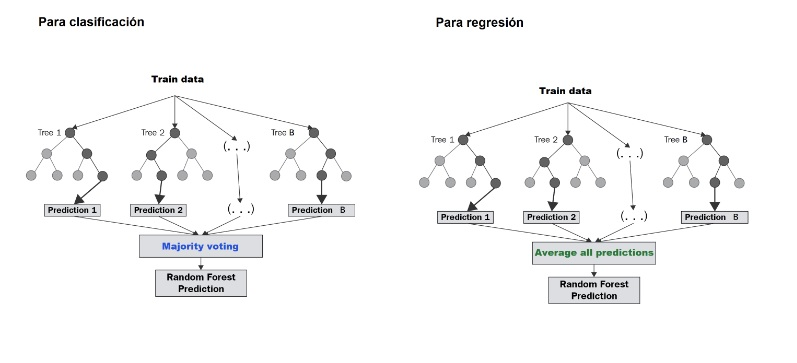

# <a name="librerias"> 1. Importación de librerias y funciones <a> 

In [3]:
# Import basic libraries.

import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')


# Import sklearn metrics.

from sklearn.metrics import plot_confusion_matrix, fbeta_score, roc_curve, classification_report,accuracy_score,roc_auc_score

# Import sklearn models, smote and pipeline.

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

Importamos las funciones a utilizar:

In [4]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [5]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [6]:
# Load the train dataset separated by other variables and target. Taking into account that the first column is the index.

x_train = pd.read_csv("../data/processed/x_train.csv",index_col=0 )
y_train = pd.read_csv("../data/processed/y_train.csv",index_col=0 )

# Load the validation dataset separated by other variables and target. Taking into account that the first column is the index.

x_val = pd.read_csv("../data/processed/x_val.csv",index_col=0 )
y_val = pd.read_csv("../data/processed/y_val.csv",index_col=0 )

# <a name="creacion"> 3. Creación del modelo <a> 

Para la creación del modelo, **utilizaremos un modelo Random Forest** con el parámetro de balanceo, con el objetivo de conseguir unos mejores scores.

In [64]:
# Hard coded variables

n_jobs = -1
random_state = 12345
class_weight = 'balanced'


# Creation of a pipeline that applies a preprocess of the data and then Random Forest

random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('clasificador', RandomForestClassifier(random_state=random_state, n_jobs=n_jobs, class_weight=class_weight))
    
])

# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [65]:
# Optimization of the random forest model with the train set: input and target data. 

random_forest.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
         

Una vez optimizado el modelo Random Forest, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [66]:
# Save the backup of the dummy optimziation as a pickle file.

save_model(logistic_regression,'../models/Random_Forest.pickle')

Para evitar ejecutar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.

In [7]:
# Load the random forest model already fitted in /models.

random_forest = load_model('../models/Random_Forest.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a> 

Una vez realizada la optimización del modelo Random Forest, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar cómo se comporta el modelo y su score.

In [8]:
# Predict target value of the validation set.

predictions = random_forest.predict(x_val)

# Predict probabilities of target value for validation set.

predict_probabilities = random_forest.predict_proba(x_val)

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

En este aparatado procederemos a análizar las métricas obtenidas. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`.

### 6.1. Matriz de confusión

Confusion matrix, without normalization
[[196392      2]
 [    83    131]]
Normalized confusion matrix
[[9.99989816e-01 1.01836105e-05]
 [3.87850467e-01 6.12149533e-01]]


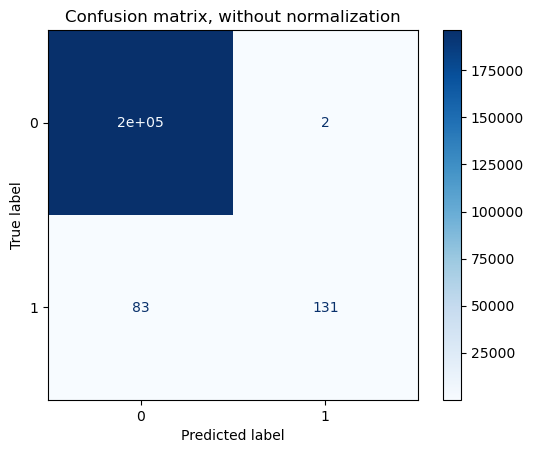

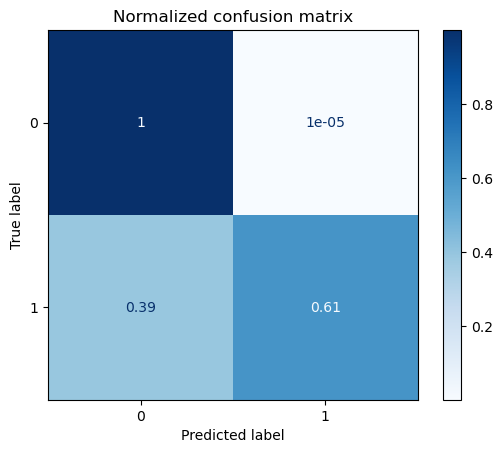

In [9]:
# List with the titles and parameters

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Plot the confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(random_forest, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Observando la matriz de confusión normalizada **se puede observar como con la clase 1 que realmente es la que nos interesa predecir, comete un fallo del 39% y un acierto del 61%**. Valor bajo, sin embargo continuamos con el análisis del resto de métricas.

### 6.2. Métricas: Accuracy, Recall, Precision, F1 y F2 score

In [16]:
# Print the general metrics.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.98      0.61      0.76       214

    accuracy                           1.00    196608
   macro avg       0.99      0.81      0.88    196608
weighted avg       1.00      1.00      1.00    196608



In [11]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions))

F2 score is 0.6622851365015167
Accuracy: 0.9995676676432291


Como ya comentamos en el documento `02_DummyModel`, nuestro dataset se caracteriza por tener un desbalanceo muy grande, es por ello que el análisis de las métricas de accuracy y precisión siempre van a ser muy elevadas, sin embargo, no reflejan la realidad predictora de nuestro modelo. Por lo que nos centraremos principalmente en las métricas F2-score y AUC .

- El modelo nos calcula un **Recall de 0.81**, dado que el modelo llega a detectar correctamente aquellas transacciones que son fraude o no.

- El modelo nos calcula un **F2 score de 0.66**, un valor mayor que en los modelos anteriores, trataremos de mejorarlo posteriormente.

### 6.3. Curva ROC

Para evaluar nuestro modelo, la representaremos graficamente para deducir que tan bueno es el modelo.

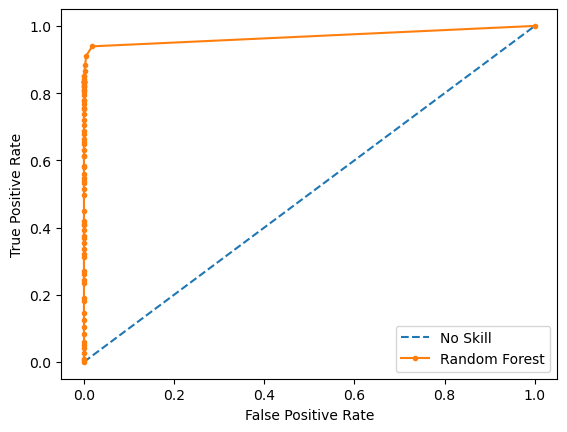

The Compute Area Under the Receiver Operating Characteristic is 0.9685686549991677


In [12]:
# Keep probabilities for the positive outcome only
yhat = predict_probabilities[:, 1]
# Calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Show the plot
plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

La curva ROC nos muestra un resultado muy bueno pero realmente atípico. Esto se debe a que los datos están desbalanceados, por lo que no utilizaremos esta métrica para compararlo con los demás modelos. 

# <a name="smote"> 7. Random Forest con SMOTE <a> 

Debido al desbalanceo de los datos se utilizará el método SMOTE para verificar si mejora el modelo.

### 7.1. Creación del modelo con SMOTE

Para la creación del modelo añadiremos en el pipeline un paso previo a la regresión, que es la aplicación del método SMOTE.

In [75]:
# Designate the hyperparameters.

n_jobs = -1
random_state = 12345
class_weight = 'balanced'
sampling_strategy = 0.4


# Creation of a pipeline that applies a preprocess of the data and then Random Forest

random_forest_SMOTE = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=sampling_strategy, n_jobs=n_jobs)),
    ('clasificador', RandomForestClassifier(random_state=random_state, n_jobs=n_jobs, class_weight=class_weight))
    
])

### 7.2. Optimización del modelo con SMOTE

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [76]:
# Optimization of the SMOTE Random Forest model with the train set: input and target data. 

random_forest_SMOTE.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
         

In [77]:
# Save the backup of the random forest smote optimization as a pickle file.

save_model(random_forest_SMOTE,'../models/Random_Forest_SMOTE.pickle')

Para evitar ejecutar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.

In [13]:
# Load the logistic_regression_SMOTE model already fitted in /models.

random_forest_SMOTE = load_model('../models/Random_Forest_SMOTE.pickle')

### 7.3. Prediccion del modelo con SMOTE

In [14]:
# Predict target value of the validation set.

predictions_SMOTE = random_forest_SMOTE.predict(x_val)

# Predict probabilities of target value for validation set.

predict_probabilities_SMOTE = random_forest_SMOTE.predict_proba(x_val)

### 7.4. Evaluación del modelo con SMOTE

#### 7.4.1 Matriz de confusión

Confusion matrix, without normalization
[[196387      7]
 [    53    161]]
Normalized confusion matrix
[[9.99964357e-01 3.56426367e-05]
 [2.47663551e-01 7.52336449e-01]]


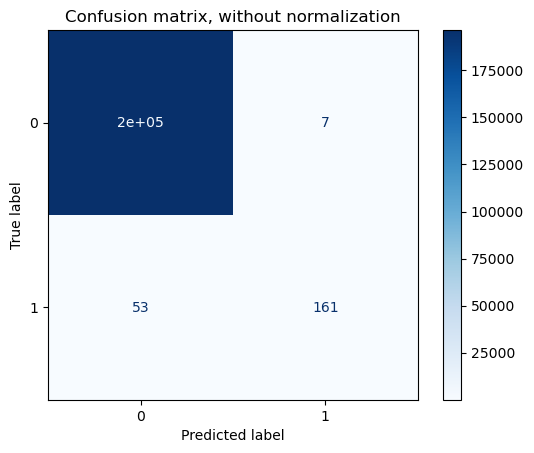

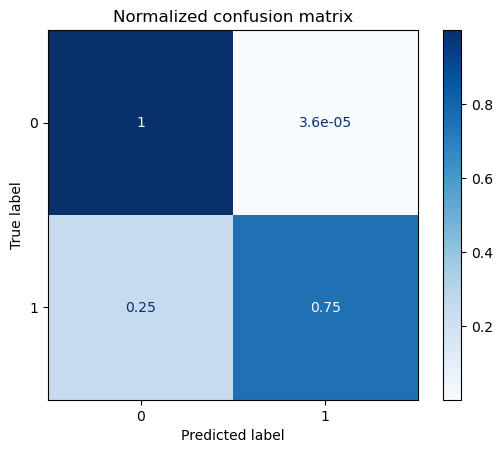

In [80]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Plot the confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(random_forest_SMOTE, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
# Display plot
plt.show()

La aplicación del SMOTE ha provocado la mejora del modelo, por lo que ha sido efectivo. Hemos pasado de acertar la clase 1 de un 61% a un 75%.

#### 7.4.2 Métricas: Accuracy, Recall, Precision, F1 score con SMOTE

In [82]:
print (classification_report(y_val, predictions_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.96      0.75      0.84       214

    accuracy                           1.00    196608
   macro avg       0.98      0.88      0.92    196608
weighted avg       1.00      1.00      1.00    196608



In [15]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions_SMOTE, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions_SMOTE))

F2 score is 0.7861328125
Accuracy: 0.99969482421875


Tras haber realizado un SMOTE con el Random Forest, se produce una mejora del modelo. **Hemos conseguido un F2 superior, pasando de un 66% a un 78%.**

**Esta métrica es la que se utilizará para comparar este modelo con los demás. En este caso, presenta un valor elevado, además de que se ha conseguido mejorar con el SMOTE, por lo que es un buen modelo.**

[Ir arriba del documento](#top)